In [3]:
import os

import requests


In [4]:
2+2

4

In [5]:
pdf_path = "human-nutrition-text.pdf"

if not os.path.exists(pdf_path):
    print("File doesn't exist downloading")
    url = "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

    filename = pdf_path
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename,'wb') as file:
            file.write(response.content)
        print(f'The file to download the file. Status code:{response.status_code}')
    else:
        print(f'Failed to download the file. Status code:{response.status_code}')

else:
    print(f'file {pdf_path} exits')



file human-nutrition-text.pdf exits


In [6]:
import fitz
from tqdm.auto import tqdm

def text_formatter(text):
    clean_text = text.replace('\n',' ').strip()
    return clean_text

def open_and_read_pdf(text):
    """
    Opens the file, reads the text content page by page and collects stats.

    Parameters: 
        pdf_path(str): The file path to the PDF document to be opened and read
    
    Return:
        list[dict]: A list of dictionaries, each containing page numbers,
        char count, word count, sentence count, token count, extracted text
        of each page.
    """

    doc = fitz.open(pdf_path)

    pages_and_text = []

    for page_number,pages in tqdm(enumerate(doc)):
        curr = {}
        text = pages.get_text()
        text = text_formatter(text)
        curr['page_number'] = page_number-41
        curr['word_count'] = len(text.split(' '))
        curr['char_count'] = len(text)
        curr['sent_count'] = len(text.split('.'))
        curr['token_count'] = len(text)/4
        curr['text'] = text
        pages_and_text.append(curr)
    return pages_and_text
pages_and_text = open_and_read_pdf(pdf_path)

0it [00:00, ?it/s]

In [7]:
pages_and_text[:5]

[{'page_number': -41,
  'word_count': 4,
  'char_count': 29,
  'sent_count': 1,
  'token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'word_count': 1,
  'char_count': 0,
  'sent_count': 1,
  'token_count': 0.0,
  'text': ''},
 {'page_number': -39,
  'word_count': 54,
  'char_count': 320,
  'sent_count': 1,
  'token_count': 80.0,
  'text': 'Human Nutrition: 2020  Edition  UNIVERSITY OF HAWAI‘I AT MĀNOA  FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM  ALAN TITCHENAL, SKYLAR HARA,  NOEMI ARCEO CAACBAY, WILLIAM  MEINKE-LAU, YA-YUN YANG, MARIE  KAINOA FIALKOWSKI REVILLA,  JENNIFER DRAPER, GEMADY  LANGFELDER, CHERYL GIBBY, CHYNA  NICOLE CHUN, AND ALLISON  CALABRESE'},
 {'page_number': -38,
  'word_count': 32,
  'char_count': 212,
  'sent_count': 3,
  'token_count': 53.0,
  'text': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program is licensed under a Creative Commons Attribution 4.0  International License

In [8]:
import pandas as pd
df = pd.DataFrame(pages_and_text)

In [9]:
df

,page_number,word_count,char_count,sent_count,token_count,text
0,-41,4,29,1,7.25,Human Nutrition: 2020 Edition
1,-40,1,0,1,0.00,
2,-39,54,320,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,32,212,3,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,147,797,3,199.25,Contents Preface University of Hawai‘i at Mā...
...,...,...,...,...,...,...
1203,1162,268,1676,40,419.00,39. Exercise 10.2 & 11.3 reused “Egg Oval Food...
1204,1163,262,1617,22,404.25,Images / Pixabay License; “Pumpkin Cartoon Ora...
1205,1164,273,1715,15,428.75,Flashcard Images Note: Most images in the fla...
1206,1165,275,1733,15,433.25,ShareAlike 11. Organs reused “Pancreas Organ ...


In [10]:
df.describe().round(2)

,page_number,word_count,char_count,sent_count,token_count
count,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,199.50,1148.00,14.18,287.00
std,348.86,95.83,560.38,9.54,140.10
min,-41.00,1.00,0.00,1.00,0.00
25%,260.75,134.00,762.00,8.00,190.50
50%,562.50,216.00,1231.50,13.00,307.88
75%,864.25,272.00,1603.50,19.00,400.88
max,1166.00,430.00,2308.00,82.00,577.00


Divide the words into sentences

In [11]:
from spacy.lang.en import English

nlp = English()
nlp.add_pipe("sentencizer")

doc = nlp('There are tow. how are you')
print(list(doc.sents))

[There are tow., how are you]


In [12]:
for item in tqdm(pages_and_text):
    doc = nlp(item['text'])
    item['sentences'] = list(doc.sents)
    item['sentences'] = [str(sentence) for sentence in item['sentences']]
    item['sentence_lenght'] = len(list(doc.sents))


  0%|          | 0/1208 [00:00<?, ?it/s]

In [13]:
df = pd.DataFrame(pages_and_text)
df

,page_number,word_count,char_count,sent_count,token_count,text,sentences,sentence_lenght
0,-41,4,29,1,7.25,Human Nutrition: 2020 Edition,[Human Nutrition: 2020 Edition],1
1,-40,1,0,1,0.00,,[],0
2,-39,54,320,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...,[Human Nutrition: 2020 Edition UNIVERSITY OF...,1
3,-38,32,212,3,53.00,Human Nutrition: 2020 Edition by University of...,[Human Nutrition: 2020 Edition by University o...,1
4,-37,147,797,3,199.25,Contents Preface University of Hawai‘i at Mā...,[Contents Preface University of Hawai‘i at M...,2
...,...,...,...,...,...,...,...,...
1203,1162,268,1676,40,419.00,39. Exercise 10.2 & 11.3 reused “Egg Oval Food...,"[39., Exercise 10.2 & 11.3 reused “Egg Oval Fo...",18
1204,1163,262,1617,22,404.25,Images / Pixabay License; “Pumpkin Cartoon Ora...,[Images / Pixabay License; “Pumpkin Cartoon Or...,10
1205,1164,273,1715,15,428.75,Flashcard Images Note: Most images in the fla...,[Flashcard Images Note: Most images in the fl...,13
1206,1165,275,1733,15,433.25,ShareAlike 11. Organs reused “Pancreas Organ ...,"[ShareAlike 11., Organs reused “Pancreas Orga...",13


In [14]:
df.describe().round(2)

,page_number,word_count,char_count,sent_count,token_count,sentence_lenght
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,199.50,1148.00,14.18,287.00,10.32
std,348.86,95.83,560.38,9.54,140.10,6.30
min,-41.00,1.00,0.00,1.00,0.00,0.00
25%,260.75,134.00,762.00,8.00,190.50,5.00
50%,562.50,216.00,1231.50,13.00,307.88,10.00
75%,864.25,272.00,1603.50,19.00,400.88,15.00
max,1166.00,430.00,2308.00,82.00,577.00,28.00


In [15]:
def split_list(list,slice_size):
    new = []
    for i in range(0,len(list),slice_size):
        new.append(list[i:i+slice_size])
    return new


In [16]:
for item in tqdm(pages_and_text):
    item['sentence_chunks'] = split_list(item['sentences'],10)
    item['nums_chunks'] = len(item['sentence_chunks'])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [17]:
import random
random.choice(pages_and_text)

{'page_number': 709,
 'word_count': 121,
 'char_count': 743,
 'sent_count': 8,
 'token_count': 185.75,
 'text': 'Learning Activities  Technology Note: The second edition of the Human  Nutrition Open Educational Resource (OER) textbook  features interactive learning activities.  These activities are  available in the web-based textbook and not available in the  downloadable versions (EPUB, Digital PDF, Print_PDF, or  Open Document).  Learning activities may be used across various mobile  devices, however, for the best user experience it is strongly  recommended that users complete these activities using a  desktop or laptop computer and in Google Chrome.    An interactive or media element has been  excluded from this version of the text. You can  view it online here:  http://pressbooks.oer.hawaii.edu/ humannutrition2/?p=409  Introduction  |  709',
 'sentences': ['Learning Activities  Technology Note: The second edition of the Human  Nutrition Open Educational Resource (OER) textbook  fe

In [18]:
df = pd.DataFrame(pages_and_text)

In [19]:
df

,page_number,word_count,char_count,sent_count,token_count,text,sentences,sentence_lenght,sentence_chunks,nums_chunks
0,-41,4,29,1,7.25,Human Nutrition: 2020 Edition,[Human Nutrition: 2020 Edition],1,[[Human Nutrition: 2020 Edition]],1
1,-40,1,0,1,0.00,,[],0,[],0
2,-39,54,320,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...,[Human Nutrition: 2020 Edition UNIVERSITY OF...,1,[[Human Nutrition: 2020 Edition UNIVERSITY O...,1
3,-38,32,212,3,53.00,Human Nutrition: 2020 Edition by University of...,[Human Nutrition: 2020 Edition by University o...,1,[[Human Nutrition: 2020 Edition by University ...,1
4,-37,147,797,3,199.25,Contents Preface University of Hawai‘i at Mā...,[Contents Preface University of Hawai‘i at M...,2,[[Contents Preface University of Hawai‘i at ...,1
...,...,...,...,...,...,...,...,...,...,...
1203,1162,268,1676,40,419.00,39. Exercise 10.2 & 11.3 reused “Egg Oval Food...,"[39., Exercise 10.2 & 11.3 reused “Egg Oval Fo...",18,"[[39., Exercise 10.2 & 11.3 reused “Egg Oval F...",2
1204,1163,262,1617,22,404.25,Images / Pixabay License; “Pumpkin Cartoon Ora...,[Images / Pixabay License; “Pumpkin Cartoon Or...,10,[[Images / Pixabay License; “Pumpkin Cartoon O...,1
1205,1164,273,1715,15,428.75,Flashcard Images Note: Most images in the fla...,[Flashcard Images Note: Most images in the fl...,13,[[Flashcard Images Note: Most images in the f...,2
1206,1165,275,1733,15,433.25,ShareAlike 11. Organs reused “Pancreas Organ ...,"[ShareAlike 11., Organs reused “Pancreas Orga...",13,"[[ShareAlike 11., Organs reused “Pancreas Org...",2


In [20]:
df.describe().round(2)

,page_number,word_count,char_count,sent_count,token_count,sentence_lenght,nums_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,199.50,1148.00,14.18,287.00,10.32,1.53
std,348.86,95.83,560.38,9.54,140.10,6.30,0.64
min,-41.00,1.00,0.00,1.00,0.00,0.00,0.00
25%,260.75,134.00,762.00,8.00,190.50,5.00,1.00
50%,562.50,216.00,1231.50,13.00,307.88,10.00,1.00
75%,864.25,272.00,1603.50,19.00,400.88,15.00,2.00
max,1166.00,430.00,2308.00,82.00,577.00,28.00,3.00


In [21]:
df.iloc[1203]['sentence_chunks']

[['39.',
  'Exercise 10.2 & 11.3 reused “Egg Oval Food” by OpenClipart- Vectors / Pixabay License  40.',
  'Exercise 10.2 reused “Salmon Fish Seafood” by OpenClipart- Vectors / Pixabay License  41.',
  'Exercise 10.2 & 11.3 reused “Meat Food Beef” by OpenClipart- Vectors / Pixabay License  42.',
  'Exercise 10.2 & 11.3 reused “Roast Chicken Lunch” by Majdias /  Pixabay License  43.',
  'Exercise 10.2 reused “Bananas Fruit Yellow” by OpenClipart- Vectors / Pixabay License  44.',
  'Exercise 10.2 reused “Porcini Mushroom Fungus” by  OpenClipart-Vectors / Pixabay License  45.',
  'Exercise 10.2 reused “Orange Fruit Healthy” by DryHeartStudio  / Pixabay License  46.',
  'Exercise 10.2 reused “Chicken Fried Wings Food” by  OpenClipart-Vectors / Pixabay License  47.',
  'Exercise 10.2 reused “French Fries Potato Chips” by  OpenClipart-Vectors / Pixabay License  48.'],
 ['Exercise 10.2 & 11.3 reused “Food Eat Salt” by Clker-Free- Vector-Images / Pixabay License  49.',
  'Exercise 10.2 reused 

In [22]:
import re

pages_and_chunks = []

for item in tqdm(pages_and_text):
    chunk = {}
    for sentence in item['sentence_chunks']:
        chunk['page_number'] = item['page_number']

        joined_sent = ''.join(sentence).replace('  ',' ').strip()
        joined_sent = re.sub(r'\.([A-Z])', r'. \1', joined_sent)
        chunk['sentence_chunk'] = joined_sent
        chunk['chunk_char_len'] = len(joined_sent)
        chunk['chunk_word_len'] = len([word for word in joined_sent.split(' ')])
        chunk['chunk_token_len'] = len(joined_sent)/4
        pages_and_chunks.append(chunk)

len(pages_and_chunks)



  0%|          | 0/1208 [00:00<?, ?it/s]

1843

In [23]:
random.sample(pages_and_chunks,k=1)

[{'page_number': 1121,
  'sentence_chunk': 'Overnutrition is an epidemic in the United States and is known to be a risk factor for many diseases, including Type 2 diabetes, cardiovascular disease, inflammatory disorders (such as rheumatoid arthritis), and cancer. Undernutrition, Overnutrition, and Malnutrition | 1121',
  'chunk_char_len': 274,
  'chunk_word_len': 39,
  'chunk_token_len': 68.5}]

In [24]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_len,chunk_word_len,chunk_token_len
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,454.79,68.31,113.70
std,347.79,359.76,57.00,89.94
min,-41.00,12.00,3.00,3.00
25%,280.50,168.00,21.00,42.00
50%,586.00,349.00,51.00,87.25
75%,890.00,682.00,105.00,170.50
max,1166.00,1830.00,297.00,457.50


In [25]:
df.head()

,page_number,sentence_chunk,chunk_char_len,chunk_word_len,chunk_token_len
0,-41,Human Nutrition: 2020 Edition,29,4,7.25
1,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00
2,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50
3,-37,Contents Preface University of Hawai‘i at Māno...,766,116,191.50
4,-36,Lifestyles and Nutrition University of Hawai‘i...,941,144,235.25


Filter out the chuks with small lentht

In [26]:
df[df['chunk_word_len']<30]

,page_number,sentence_chunk,chunk_char_len,chunk_word_len,chunk_token_len
0,-41,Human Nutrition: 2020 Edition,29,4,7.25
35,-5,Billy Meinke Billy is the Open Educational Res...,161,25,40.25
41,1,PART I CHAPTER 1. BASIC CONCEPTS IN NUTRITION ...,88,16,22.00
54,12,Learning activities may be used across various...,133,21,33.25
55,12,Learning activities may be used across various...,133,21,33.25
...,...,...,...,...,...
1811,1144,Dietitians and Nutritionists. Bureau of Labor ...,252,27,63.00
1812,1144,Dietitians and Nutritionists. Bureau of Labor ...,252,27,63.00
1818,1149,PART XIX APPENDICES Appendices | 1149,37,6,9.25
1827,1158,Figure 15.1 reused “Silohuette of Three People...,110,17,27.50


In [27]:
pages_and_chunks_over_min = df[df['chunk_token_len']>30].to_dict(orient = 'records')
pages_and_chunks_over_min[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_len': 308,
  'chunk_word_len': 42,
  'chunk_token_len': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_len': 210,
  'chunk_word_len': 30,
  'chunk_token_len': 52.5}]

Embedding our text chunks

In [28]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device="cpu")


c:\Users\saive\Desktop\rag\venv\Lib\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\saive\Desktop\rag\venv\Lib\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [29]:
sentences = ['I am good', 'I am bad']

embeddings = embedding_model.encode(sentences)

embedding_dict = dict(zip(sentences,embeddings))

for sentence, emb in embedding_dict.items():
    print(f'sentences: {sentence}')
    print(f'embedding :{emb}')

sentences: I am good
embedding :[ 3.85924913e-02  3.36283655e-03  2.50831060e-03  2.75167115e-02
  3.00994776e-02  1.68417860e-02 -4.41322736e-02 -9.93872993e-03
  2.08922029e-02 -3.46871242e-02 -2.71358006e-02 -4.76690270e-02
  2.40659434e-02  2.88879089e-02  2.39127949e-02 -2.71607637e-02
 -3.81020382e-02 -2.09754296e-02  7.09625380e-03  3.06471460e-03
 -2.00877581e-02  1.38562089e-02 -3.72488201e-02 -2.55824756e-02
  3.40341404e-02 -5.36201429e-03  2.33029220e-02  2.31622513e-02
 -3.61564308e-02 -3.35797332e-02 -5.08300848e-02 -1.92823987e-02
 -1.03911692e-02  8.14289600e-03  1.69429291e-06 -6.00542361e-03
 -1.49289304e-02 -7.99119007e-03 -5.34411008e-03  1.12102637e-02
  4.73019294e-03 -6.26558512e-02 -2.75620669e-02  3.86152454e-02
 -2.78987251e-02 -2.06883363e-02 -2.26960909e-02  2.86694486e-02
  4.19660732e-02  3.08682304e-02 -5.18640364e-03 -3.70338862e-03
  3.39571796e-02 -2.13574804e-02  2.48578712e-02 -2.56689843e-02
 -3.36281657e-02  4.73823734e-02  4.20102887e-02  2.376411

In [30]:
text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min]
text_chunks[419]

'They help form nerve cell membranes, insulate neurons, and facilitate the signaling of electrical impulses throughout the brain. Insulating and Protecting Did you know that up to 30 percent of body weight is comprised of fat tissue?Some of this is made up of visceral fat or adipose tissue surrounding delicate organs. Vital organs such as the heart, kidneys, and liver are protected by visceral fat. The composition of the brain is outstandingly 60 percent fat, demonstrating the major structural role that fat serves within the body. You may be most familiar with The Functions of Lipids in the Body | 297'

In [31]:
text_chunk_emb = embedding_model.encode(text_chunks,
                       batch_size =32,
                       convert_to_tensor = True)

text_chunk_emb


tensor([[ 0.0674,  0.0902, -0.0051,  ..., -0.0221, -0.0232,  0.0126],
        [ 0.0552,  0.0592, -0.0166,  ..., -0.0120, -0.0103,  0.0227],
        [ 0.0280,  0.0340, -0.0206,  ..., -0.0054,  0.0213,  0.0313],
        ...,
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.0864, -0.0125, -0.0113,  ..., -0.0522, -0.0337, -0.0299]])

In [32]:
len(text_chunk_emb)

1525

In [33]:
len(pages_and_chunks_over_min)

1525

In [34]:
for i in range (len(pages_and_chunks_over_min)):
    pages_and_chunks_over_min[i]['embeddings'] = text_chunk_emb[i]

In [37]:
pages_and_chunks_over_min[0]

{'page_number': -39,
 'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
 'chunk_char_len': 308,
 'chunk_word_len': 42,
 'chunk_token_len': 77.0,
 'embeddings': tensor([ 6.7424e-02,  9.0228e-02, -5.0955e-03, -3.1755e-02,  7.3908e-02,
          3.5198e-02, -1.9799e-02,  4.6769e-02,  5.3573e-02,  5.0123e-03,
          3.3393e-02, -1.6222e-03,  1.7608e-02,  3.6265e-02, -3.1679e-04,
         -1.0712e-02,  1.5426e-02,  2.6218e-02,  2.7766e-03,  3.6494e-02,
         -4.4411e-02,  1.8936e-02,  4.9012e-02,  1.6402e-02, -4.8578e-02,
          3.1828e-03,  2.7299e-02, -2.0475e-03, -1.2283e-02, -7.2805e-02,
          1.2045e-02,  1.0730e-02,  2.1000e-03, -8.1777e-02,  2.6783e-06,
         -1.8143e-02, -1.2080e-02,  2.4717e

In [36]:
df = pd.DataFrame(pages_and_chunks_over_min)
df

,page_number,sentence_chunk,chunk_char_len,chunk_word_len,chunk_token_len,embeddings
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"[tensor(0.0674), tensor(0.0902), tensor(-0.005..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"[tensor(0.0552), tensor(0.0592), tensor(-0.016..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,116,191.50,"[tensor(0.0280), tensor(0.0340), tensor(-0.020..."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,144,235.25,"[tensor(0.0683), tensor(0.0381), tensor(-0.008..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"[tensor(0.0330), tensor(-0.0085), tensor(0.009..."
...,...,...,...,...,...,...
1520,1164,Hazard Analysis Critical Control Points reused...,374,51,93.50,"[tensor(0.0335), tensor(-0.0570), tensor(0.015..."
1521,1164,Hazard Analysis Critical Control Points reused...,374,51,93.50,"[tensor(0.0335), tensor(-0.0570), tensor(0.015..."
1522,1165,Sucrose reused “Figure 03 02 05” by OpenStax B...,410,63,102.50,"[tensor(0.1030), tensor(-0.0165), tensor(0.008..."
1523,1165,Sucrose reused “Figure 03 02 05” by OpenStax B...,410,63,102.50,"[tensor(0.1030), tensor(-0.0165), tensor(0.008..."


In [41]:
import os
print(os.getcwd())

embedding_save_path = 'text_chunks_and_embedds.csv'
df.to_csv(embedding_save_path, index=False)

print("File saved successfully")


c:\Users\saive\Desktop\All projects\rag
File saved successfully


In [ ]:
embedding_save_path = 'text_chunks_and_embedds.csv'

In [65]:
data = pd.read_csv(embedding_save_path)
data.head()

,page_number,sentence_chunk,chunk_char_len,chunk_word_len,chunk_token_len,embeddings
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"tensor([ 6.7424e-02, 9.0228e-02, -5.0955e-03,..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"tensor([ 5.5216e-02, 5.9214e-02, -1.6617e-02,..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,116,191.50,"tensor([ 2.7980e-02, 3.3981e-02, -2.0643e-02,..."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,144,235.25,"tensor([ 6.8257e-02, 3.8127e-02, -8.4686e-03,..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"tensor([ 3.3026e-02, -8.4977e-03, 9.5715e-03,..."


In [70]:
text_chunk_emb.shape,text_chunk_emb.dtype

(torch.Size([1525, 768]), torch.float32)

In [71]:
import numpy as np
import torch
embeddings = torch.tensor(np.stack(text_chunk_emb,axis = 0),dtype = torch.float32)


In [72]:
embeddings[0]

tensor([ 6.7424e-02,  9.0228e-02, -5.0955e-03, -3.1755e-02,  7.3908e-02,
         3.5198e-02, -1.9799e-02,  4.6769e-02,  5.3573e-02,  5.0123e-03,
         3.3393e-02, -1.6222e-03,  1.7608e-02,  3.6265e-02, -3.1679e-04,
        -1.0712e-02,  1.5426e-02,  2.6218e-02,  2.7766e-03,  3.6494e-02,
        -4.4411e-02,  1.8936e-02,  4.9012e-02,  1.6402e-02, -4.8578e-02,
         3.1828e-03,  2.7299e-02, -2.0475e-03, -1.2283e-02, -7.2805e-02,
         1.2045e-02,  1.0730e-02,  2.1000e-03, -8.1777e-02,  2.6783e-06,
        -1.8143e-02, -1.2080e-02,  2.4717e-02, -6.2747e-02,  7.3544e-02,
         2.2162e-02, -3.2877e-02, -1.8010e-02,  2.2295e-02,  5.6137e-02,
         1.7951e-03,  5.2593e-02, -3.3174e-03, -8.3387e-03, -1.0629e-02,
         2.3192e-03, -2.2393e-02, -1.5301e-02, -9.9306e-03,  4.6532e-02,
         3.5747e-02, -2.5476e-02,  2.6370e-02,  3.7492e-03, -3.8268e-02,
         2.5833e-02,  4.1287e-02,  2.5818e-02,  3.3297e-02, -2.5178e-02,
         4.5152e-02,  4.4898e-04, -9.9662e-02,  4.9

In [73]:
embeddings.shape

torch.Size([1525, 768])

In [74]:
query = 'Tell me about vitamin A'
encoded_query = embedding_model.encode(query)

In [78]:
from sentence_transformers import util

dot_score = util.dot_score(encoded_query,embeddings)[0]

In [79]:
results = torch.topk(dot_score,k = 5)
results

torch.return_types.topk(
values=tensor([0.6733, 0.6522, 0.6444, 0.6395, 0.6395]),
indices=tensor([718, 723, 707, 716, 717]))

In [86]:
data.iloc[0]['sentence_chunk']

'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE'

In [90]:
from pprint import pprint
for score,index in zip(results[0],results[1]):
    # print(score)
    index = int(index)
    # print(index)
    
    pprint(f'score:{score}')
    pprint(data.iloc[index]['sentence_chunk'])
    print('\n')

'score:0.6732668876647949'
('Growth and Development Vitamin A acts similarly to some hormones in that it '
 'is able to change the amount of proteins in cells by interacting with DNA. '
 'This is the primary way that vitamin A affects growth and development. '
 'Vitamin A deficiency in children is linked to growth retardation; however, '
 'vitamin A deficiency is often accompanied by protein malnutrition and iron '
 'deficiency, thereby confounding the investigation of vitamin A’s specific '
 'effects on growth and development. In the fetal stages of life, vitamin A is '
 'important for limb, heart, eye, and ear development and in both deficiency '
 'and excess, vitamin A causes birth defects. Furthermore, both males and '
 'females require vitamin A in the diet to effectively reproduce. Cancer '
 'Vitamin A’s role in regulating cell growth and death, especially in tissues '
 'that line and cover organs, suggests it may be effective in treating certain '
 'cancers of the lung, neck, an

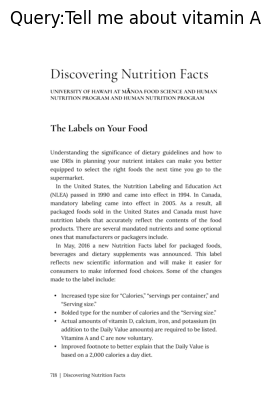

In [97]:
import fitz

index = int(results[1][0])
pdf_path = "human-nutrition-text.pdf"
doc = fitz.open(pdf_path)

page = doc.load_page(index+41)

img = page.get_pixmap(dpi = 300)

image_arr = np.frombuffer(img.samples_mv,
                          dtype = np.uint8).reshape((img.h,img.w,img.n))

import matplotlib.pyplot as plt
plt.imshow(image_arr)
plt.title(f'Query:{query}')
plt.axis('off');


In [94]:
image_arr.shap

(12622500,)